<a href="https://colab.research.google.com/github/Pranjali012/Sentiment-Analysis/blob/main/Hotel_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import os
import pandas as pd
from string import punctuation
from textblob import Word 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [ ]:
 #Load the libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing.text import Tokenizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import xgboost
from sklearn import svm,tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
 #Load the libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Loading the data set
train=pd.read_csv("/content/drive/MyDrive/tripadvisor_hotel_review.csv")
train.head()

FileNotFoundError: ignored

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
for dirname, _, filenames in os.walk('./IMDB'): 
    for filename in filenames:
        print(filename)

In [ ]:
train['sentiment'].replace({"positive":1,"negative":0},inplace=True)

TypeError: ignored

1    25000
0    25000
Name: sentiment, dtype: int64

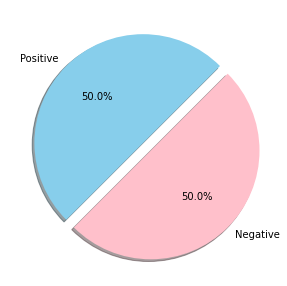

In [ ]:
#Plotting the Pie chart
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
pos = train['sentiment']==1
neg = train['sentiment']==0
ck = [pos.count(),neg.count()]
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))
train.sentiment.value_counts()

In [ ]:
def transformations(dataframe):
    #HTML Tags removal
    dataframe['review'] = dataframe['review'].apply(lambda words: re.sub('<.*?>','',words)) 
    #Word Tokenization
    dataframe['review'] = dataframe['review'].apply(word_tokenize)
    #Lower case conversion
    dataframe['review'] = dataframe['review'].apply(lambda words: [x.lower() for x in words])
    #Punctuation removal
    dataframe['review'] = dataframe['review'].apply(lambda words: [x for x in words if not x in punctuation])
    #Number removal
    dataframe['review'] = dataframe['review'].apply(lambda words: [x for x in words if not x.isdigit()])
    #Stopword removal
    dataframe['review'] = dataframe['review'].apply(lambda words: [x for x in words if x not in stopwords.words('english')])
    #Frequent word removal
    temp = dataframe['review'].apply(lambda words: " ".join(words))
    freq = pd.Series(temp).value_counts()[:10]
    dataframe['review'] = dataframe['review'].apply(lambda words: [x for x in words if x not in freq.keys()])
    #Lemmatization
    dataframe['review'] = dataframe['review'].apply(lambda words: " ".join([Word(x).lemmatize() for x in words]))
    return dataframe

In [ ]:
train = transformations(train)
train.head()

,review,sentiment
0,one reviewer mentioned watching oz episode 'll...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically 's family little boy jake think 's z...,0
4,petter mattei 's `` love time money '' visuall...,1


In [ ]:
train['sentiment'].replace({"positive":1,"negative":0},inplace=True)

TypeError: ignored

In [ ]:
train.head()

In [ ]:
texts = ' '.join(train['review'])
string = texts.split(" ")

In [ ]:
def draw_n_gram(string,i):
  import seaborn as sns
  n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:7]
  n_gram_df=pd.DataFrame(n_gram)
  n_gram_df = n_gram_df.reset_index()
  n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
  print(n_gram_df.head())
  plt.figure(figsize = (10,5))
  return sns.barplot(x='count',y='word', data=n_gram_df)

       word   count
0     ('s,)  122104
1  (movie,)   99695
2   (film,)   90334
3     (``,)   66643
4    (n't,)   66239


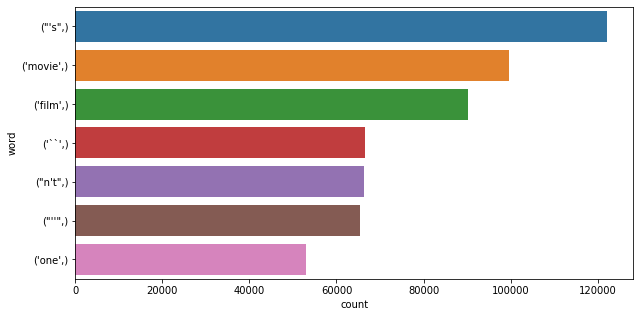

In [ ]:
#Unigram Analysis
draw_n_gram(string,1)

In [ ]:
#Tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
#transformed validation reviews
tv_val_reviews=tv.transform(norm_val_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)
print('Tfidf_val:',tv_val_reviews.shape)

Tfidf_train: (30000, 4843948)
Tfidf_test: (10000, 4843948)
Tfidf_val: (10000, 4843948)


<function matplotlib.pyplot.show>

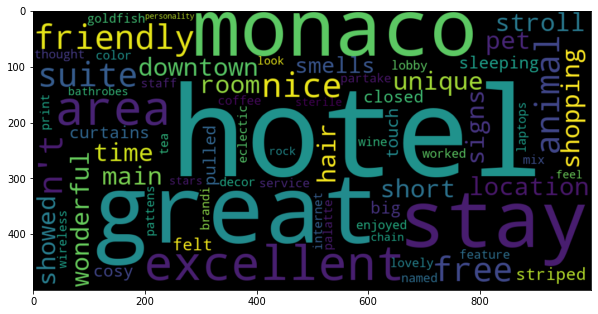

In [ ]:
#word cloud for positive review words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
positive_text=x[3]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

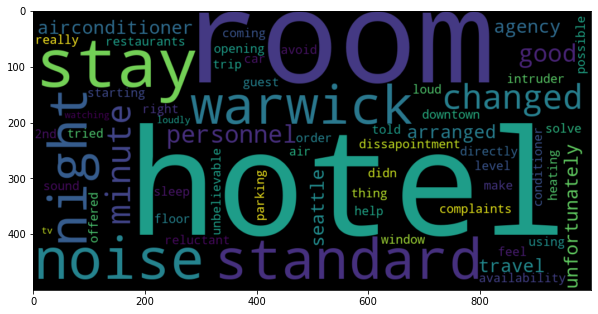

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=x[32]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from bs4 import BeautifulSoup
import nltk
import sklearn
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Loading the data set
df=pd.read_csv("/content/drive/MyDrive/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.head(40)

,review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,positive
1,ok nothing special charge diamond member hilto...,2,negative
2,nice rooms not 4* experience hotel monaco seat...,3,negative
3,"unique, great stay, wonderful time hotel monac...",5,positive
4,"great stay great stay, went seahawk game aweso...",5,positive
5,love monaco staff husband stayed hotel crazy w...,5,positive
6,"cozy stay rainy city, husband spent 7 nights m...",5,positive
7,"excellent staff, housekeeping quality hotel ch...",4,positive
8,"hotel stayed hotel monaco cruise, rooms genero...",5,positive
9,excellent stayed hotel monaco past w/e delight...,5,positive


In [ ]:



neutral_range = {"low": 4, "high": 4}
df["sentiment"] = "neutral"
df["sentiment"].loc[df["Rating"] < neutral_range["low"]] = "negative"
df["sentiment"].loc[df["Rating"] >= neutral_range["high"]] = "positive"
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,positive
1,ok nothing special charge diamond member hilto...,2,negative
2,nice rooms not 4* experience hotel monaco seat...,3,negative
3,"unique, great stay, wonderful time hotel monac...",5,positive
4,"great stay great stay, went seahawk game aweso...",5,positive


In [ ]:
df.rename(columns={'Review':'review'},inplace=True)

In [ ]:
def remove_html(text):
    bs = BeautifulSoup(text, "html.parser")
    return ' ' + bs.get_text() + ' '
 
def keep_only_letters(text):
    text=re.sub(r'[^a-zA-Z\s]','',text)
    return text
 
def convert_to_lowercase(text):
    return text.lower()
 
def clean_reviews(text):
    text = remove_html(text)
    text = keep_only_letters(text)
    text = convert_to_lowercase(text)
    return text

In [ ]:
english_stop_words = nltk.corpus.stopwords.words('english')
print(len(english_stop_words))
print (english_stop_words[:20])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
def remove_stop_words(text):
    for stopword in english_stop_words:
        stopword = ' ' + stopword + ' '
        text = text.replace(stopword, ' ')
    return text
 
df_clean = df['review'].apply(remove_stop_words)

In [ ]:
def text_stemming(text):
    stemmer = nltk.porter.PorterStemmer()
    stemmed = ' '.join([stemmer.stem(token) for token in text.split()])
    return stemmed
 
df_clean = df['review'].apply(text_stemming)

In [ ]:
texts = ' '.join(df['review'])
string = texts.split(" ")

In [ ]:
df.shape

(20491, 3)

In [ ]:
x = df["review"].copy()
y = df["sentiment"].copy()

In [ ]:
df['sentiment'] = df['sentiment'].map({0: 'negative',  1:'positive'})

In [ ]:
train_labels = [1 if sentiment=='positive' else 0 for sentiment in df['sentiment']]
test_labels = [1 if sentiment=='positive' else 0 for sentiment in df['sentiment']]
print (len(train_labels), len(test_labels))

20491 20491


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(tfidf,y,test_size=0.2,random_state=42)

In [ ]:
tfidfconverter = TfidfVectorizer(max_features=400, min_df=0.05, max_df=0.9)
tfidf = tfidfconverter.fit_transform(df_clean).toarray()

In [ ]:
nb = MultinomialNB()

nb_model=nb.fit(X_train,y_train)

y_pred=nb_model.predict(X_test)

print("Accuracy Multinominal:",accuracy_score(y_test, y_pred))


Accuracy Multinominal: 0.8050744083922908


In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(y_test, y_pred, ))

              precision    recall  f1-score   support

    Negative       0.91      0.27      0.42      1057
    Positive       0.80      0.99      0.88      3042

    accuracy                           0.81      4099
   macro avg       0.85      0.63      0.65      4099
weighted avg       0.83      0.81      0.76      4099

[[ 286  771]
 [  28 3014]]


In [ ]:
def draw_n_gram(string,i):
  import seaborn as sns
  n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:7]
  n_gram_df=pd.DataFrame(n_gram)
  n_gram_df = n_gram_df.reset_index()
  n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
  print(n_gram_df.head())
  plt.figure(figsize = (10,5))
  return sns.barplot(x='count',y='word', data=n_gram_df)


       word  count
0  (hotel,)  45542
1   (room,)  41472
2   (stay,)  23692
3  (great,)  18784
4    (n't,)  18436


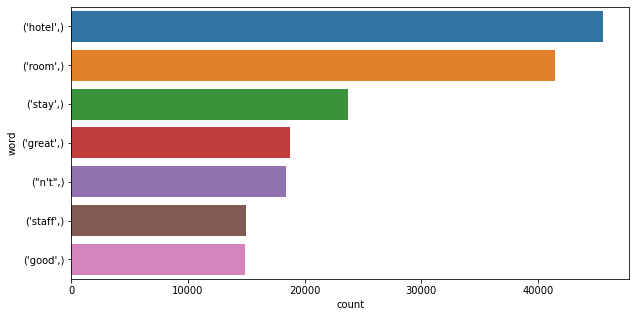

In [ ]:
#Unigram Analysis
draw_n_gram(string,1)


In [ ]:
imdb_train = data[:16393]
imdb_test = data[16393:]

In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)

(16393, 41592) (4098, 41592)


In [ ]:
train_labels = [1 if sentiment=='positive' else 0 for sentiment in imdb_train['sentiment']]
test_labels = [1 if sentiment=='positive' else 0 for sentiment in imdb_test['sentiment']]
print (len(train_labels), len(test_labels))

16393 4098


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.83      0.75      0.79       937
    Positive       0.93      0.95      0.94      3161

    accuracy                           0.91      4098
   macro avg       0.88      0.85      0.87      4098
weighted avg       0.91      0.91      0.91      4098

[[ 706  231]
 [ 145 3016]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.90      0.57      0.69       937
    Positive       0.88      0.98      0.93      3161

    accuracy                           0.89      4098
   macro avg       0.89      0.77      0.81      4098
weighted avg       0.89      0.89      0.88      4098

[[ 530  407]
 [  60 3101]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.82      0.77      0.79       937
    Positive       0.93      0.95      0.94      3161

    accuracy                           0.91      4098
   macro avg       0.87      0.86      0.87      4098
weighted avg       0.91      0.91      0.91      4098

[[ 721  216]
 [ 163 2998]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.88      0.72      0.80       937
    Positive       0.92      0.97      0.95      3161

    accuracy                           0.91      4098
   macro avg       0.90      0.85      0.87      4098
weighted avg       0.91      0.91      0.91      4098

[[ 678  259]
 [  90 3071]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.99      0.13      0.23       937
    Positive       0.79      1.00      0.89      3161

    accuracy                           0.80      4098
   macro avg       0.89      0.56      0.56      4098
weighted avg       0.84      0.80      0.74      4098

[[ 121  816]
 [   1 3160]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive'],labels=np.unique(predictions)))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.77      1.00      0.87      3161

   micro avg       0.77      1.00      0.87      3161
   macro avg       0.77      1.00      0.87      3161
weighted avg       0.77      1.00      0.87      3161

[[   0  937]
 [   0 3161]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2128: UserWarning: labels size, 1, does not match size of target_names, 2
  len(labels), len(target_names)


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = RandomForestClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.97      0.15      0.25       937
    Positive       0.80      1.00      0.89      3161

    accuracy                           0.80      4098
   macro avg       0.88      0.57      0.57      4098
weighted avg       0.84      0.80      0.74      4098

[[ 137  800]
 [   4 3157]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = RandomForestClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.93      0.23      0.36       937
    Positive       0.81      0.99      0.89      3161

    accuracy                           0.82      4098
   macro avg       0.87      0.61      0.63      4098
weighted avg       0.84      0.82      0.77      4098

[[ 212  725]
 [  16 3145]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = KNeighborsClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.40      0.22      0.29       937
    Positive       0.80      0.90      0.85      3161

    accuracy                           0.75      4098
   macro avg       0.60      0.56      0.57      4098
weighted avg       0.71      0.75      0.72      4098

[[ 210  727]
 [ 316 2845]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = KNeighborsClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.70      0.37      0.48       937
    Positive       0.84      0.95      0.89      3161

    accuracy                           0.82      4098
   macro avg       0.77      0.66      0.69      4098
weighted avg       0.80      0.82      0.80      4098

[[ 344  593]
 [ 150 3011]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = xgboost.XGBClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.82      0.52      0.63       937
    Positive       0.87      0.97      0.92      3161

    accuracy                           0.86      4098
   macro avg       0.84      0.74      0.77      4098
weighted avg       0.86      0.86      0.85      4098

[[ 483  454]
 [ 108 3053]]


In [ ]:

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = xgboost.XGBClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.80      0.52      0.63       937
    Positive       0.87      0.96      0.91      3161

    accuracy                           0.86      4098
   macro avg       0.84      0.74      0.77      4098
weighted avg       0.86      0.86      0.85      4098

[[ 486  451]
 [ 119 3042]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = tree.DecisionTreeClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.55      0.56      0.55       937
    Positive       0.87      0.87      0.87      3161

    accuracy                           0.80      4098
   macro avg       0.71      0.71      0.71      4098
weighted avg       0.80      0.80      0.80      4098

[[ 521  416]
 [ 421 2740]]


In [ ]:

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = tree.DecisionTreeClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.47      0.58      0.52       937
    Positive       0.87      0.81      0.84      3161

    accuracy                           0.76      4098
   macro avg       0.67      0.69      0.68      4098
weighted avg       0.78      0.76      0.76      4098

[[ 544  393]
 [ 610 2551]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = AdaBoostClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.72      0.64      0.68       937
    Positive       0.90      0.93      0.91      3161

    accuracy                           0.86      4098
   macro avg       0.81      0.78      0.79      4098
weighted avg       0.86      0.86      0.86      4098

[[ 603  334]
 [ 237 2924]]


In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(imdb_train['review'])
tf_features_test = vectorizer.transform(imdb_test['review'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = AdaBoostClassifier()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

(16393, 2142947) (4098, 2142947)
              precision    recall  f1-score   support

    Negative       0.74      0.64      0.68       937
    Positive       0.90      0.93      0.91      3161

    accuracy                           0.86      4098
   macro avg       0.82      0.78      0.80      4098
weighted avg       0.86      0.86      0.86      4098

[[ 596  341]
 [ 214 2947]]
